In [1]:
from constants import *
from obfuscation import *
from run_obfuscation import * 
from data_utils import *
from stereo_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle
from pathlib import Path

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
dataset_files = list(read_dataset_to_obfuscate(f"{ROOT_DIR}/obfuscation/ml-1m"))
original_data = { data_slice:transform_to_obf(data) for data_slice,data in zip(['train','valid','test'],dataset_files)}


In [3]:
data_dir = f"{ROOT_DIR}/obfuscation/ml-1m"
def calculate_dataset_stereo(data_dir,stereo_types=["mean","median"]):
    train_data, valid_data, test_data, inclination_data, user_features, dataset_name  = read_dataset_to_obfuscate(data_dir)
    for stereo_type in stereo_types:
        user_stereo_scores = []
        for user  in user_features["userID"].values:        
            user_data, valid_user_items, user_ff_values, user_stereo_score = prepare_user_to_obf(ff_data=inclination_data,sterotyp_method=stereo_type,train_data=train_data,user=user)
            user_stereo_scores.append(user_stereo_score)
        user_features[f"stereo_{stereo_type}"] = user_stereo_scores
    return user_features
def read_dataset_stereo(data_dir):
    dataset_name = data_dir.split("/")[-1]
    return pd.read_csv(f"{data_dir}/{dataset_name}_user_ster.csv",index_col="userID")

In [103]:
obf_dir = f"{ROOT_DIR}/obfuscation"
data_dirs = !ls {ROOT_DIR}/ob*
dataset = "ml-1m-1000_"
data_dict = {url:f"{obf_dir}/{url}" for url in data_dirs if url.startswith(dataset)} 

In [104]:
obf_dict_datasets={}
original_ster_data = read_dataset_stereo(f"{obf_dir}/ml-1m-1000")
for dset,url in data_dict.items():
    print(f"Proessing: {dset}")
    obf_dict_datasets[dset]=read_dataset_stereo(url)
    obf_dict_datasets[dset][dset]=obf_dict_datasets[dset]
    obf_dict_datasets[dset]=obf_dict_datasets[dset][dset]


Proessing: ml-1m-1000_imputate_0.05_ff_mean-abs_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_mean_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_median-abs_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_median_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_mean-abs_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_mean_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_median-abs_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_median_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_inc_ratio_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_mean-abs_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_mean_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_mean_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_median-abs_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_median_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_median_th0.25
Proessing: ml-1m-1000_remove_0.15_ff_inc_ratio_th0.005
Proessing: ml-1m-1000_remove_0.15_ff_mean_th0.005
Proessing: ml-1m-1000_remove_0.15_ff_median_th0.005
Proessing: ml-1m-1000_remove_0.1_ff_inc_ratio_th0.

In [109]:
list_data =list(obf_dict_datasets.values())
list_data.append(original_ster_data["mean-"])
perturbated_datasets = pd.concat(list_data,axis=1)


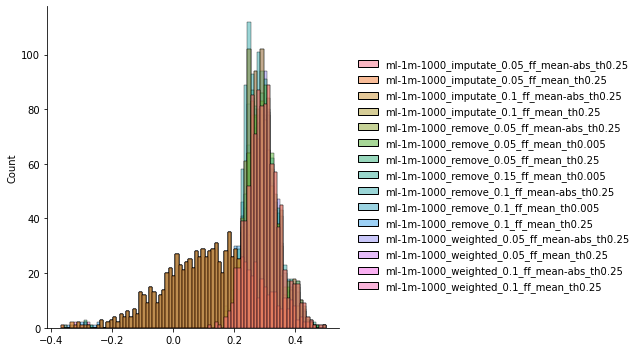

In [110]:
sns.displot(perturbated_datasets[[c for c in perturbated_datasets.columns if "mean" in c ]])

In [106]:
data_plot = perturbated_datasets[[c for c in perturbated_datasets.columns if "median" in c ]].sort_values("median",ascending=False)
sns.heatmap(data_plot[:50].T,cmap="Blues")

KeyError: 'median'

Proessing: ml-1m-1000_imputate_0.05_ff_mean-abs_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_mean_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_median-abs_th0.25
Proessing: ml-1m-1000_imputate_0.05_ff_median_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_mean-abs_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_mean_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_median-abs_th0.25
Proessing: ml-1m-1000_imputate_0.1_ff_median_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_inc_ratio_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_mean-abs_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_mean_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_mean_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_median-abs_th0.25
Proessing: ml-1m-1000_remove_0.05_ff_median_th0.005
Proessing: ml-1m-1000_remove_0.05_ff_median_th0.25
Proessing: ml-1m-1000_remove_0.15_ff_inc_ratio_th0.005
Proessing: ml-1m-1000_remove_0.15_ff_mean_th0.005
Proessing: ml-1m-1000_remove_0.15_ff_median_th0.005
Proessing: ml-1m-1000_remove_0.1_ff_inc_ratio_th0.

<AxesSubplot:ylabel='userID'>

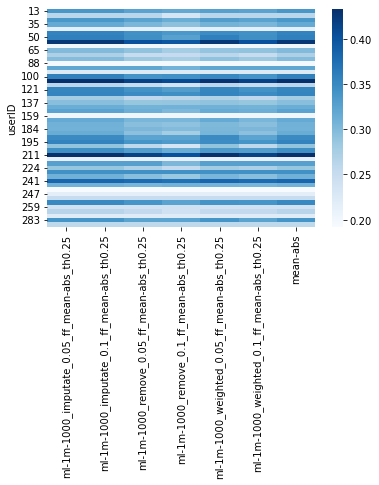

In [129]:
obf_dict_datasets={}
original_ster_data = read_dataset_stereo(f"{obf_dir}/ml-1m-1000")
for dset,url in data_dict.items():
    print(f"Proessing: {dset}")
    obf_dict_datasets[dset]=read_dataset_stereo(url)
    obf_dict_datasets[dset][dset]=obf_dict_datasets[dset]
    obf_dict_datasets[dset]=obf_dict_datasets[dset][dset]
list_data =list(obf_dict_datasets.values())
ster_type = "mean-abs"
list_data.append(original_ster_data[ster_type])
perturbated_datasets = pd.concat(list_data,axis=1)
data_plot = perturbated_datasets[[c for c in perturbated_datasets.columns if ster_type in c ]]#.sort_values("mean",ascending=False)
sns.heatmap(data_plot[:50],cmap="Blues")

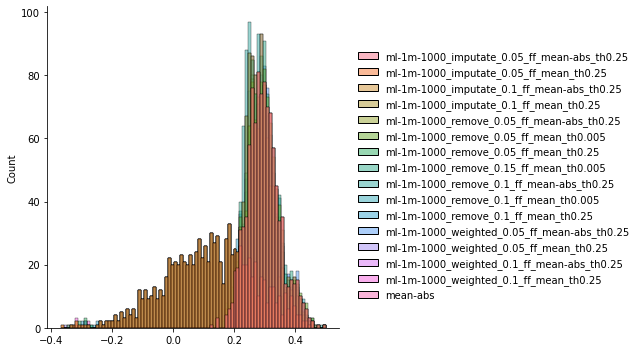

In [127]:
sns.displot(perturbated_datasets[[c for c in perturbated_datasets.columns if "mean" in c ]])

In [131]:
data_plot.describe().T.sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
ml-1m-1000_remove_0.1_ff_mean-abs_th0.25,1000.0,0.280971,0.049355,0.124789,0.246393,0.275477,0.308298,0.482473
ml-1m-1000_remove_0.05_ff_mean-abs_th0.25,1000.0,0.287592,0.051463,0.124789,0.250332,0.284251,0.315536,0.500137
ml-1m-1000_weighted_0.1_ff_mean-abs_th0.25,1000.0,0.287592,0.051463,0.124789,0.250332,0.284251,0.315536,0.500137
ml-1m-1000_weighted_0.05_ff_mean-abs_th0.25,1000.0,0.292397,0.052832,0.124789,0.256994,0.289192,0.321125,0.500137
ml-1m-1000_imputate_0.05_ff_mean-abs_th0.25,1000.0,0.296745,0.054123,0.124789,0.260972,0.293574,0.327995,0.500137
ml-1m-1000_imputate_0.1_ff_mean-abs_th0.25,1000.0,0.296745,0.054123,0.124789,0.260972,0.293574,0.327995,0.500137
mean-abs,1000.0,0.296745,0.054123,0.124789,0.260972,0.293574,0.327995,0.500137


In [144]:
all_small_datasets_root  = "/share/rk4/home/gustavoe/all_full_test"
dataset = "ml-1m"
attribute = "gender_bacc"
def get_ofb_grouped_results(data_root,dataset, attribute):
    data_results=pd.read_csv(f"{all_small_datasets_root}/{dataset}/test_set_attacker_evaluation.csv")
    grouped = data_results.groupby("dataset")[attribute].agg("mean","std").reset_index()
    grouped["dataset_name"]=grouped["dataset"]
    grouped[["dataset","obf_method","p_sample","sample_method","user_ster_method","user_ster_threshold"]]=pd.DataFrame(grouped["dataset"].str.split("_").to_list(),index=grouped.index)

    return grouped

In [145]:
ml_results = get_ofb_grouped_results(all_small_datasets_root,"ml-1m",attribute)
lfm_results = get_ofb_grouped_results(all_small_datasets_root,"lfm-100k",attribute)


<AxesSubplot:xlabel='gender_bacc', ylabel='obf_method'>

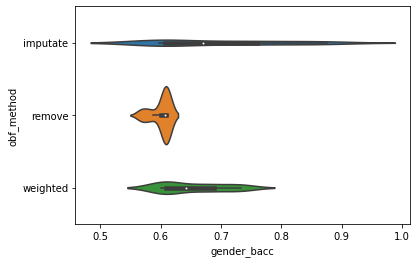

In [146]:
sns.violinplot(ml_results,x="gender_bacc", y="obf_method")


<AxesSubplot:xlabel='gender_bacc', ylabel='obf_method'>

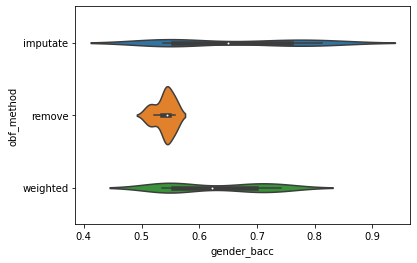

In [147]:
sns.violinplot(lfm_results,x="gender_bacc", y="obf_method")

In [153]:

results_recs = pd.read_csv("/share/rk4/home/gustavoe/obfuscation/full_train/result_table-right.csv")

In [149]:
results_recs[["dataset","obf_method","p_sample","sample_method","user_ster_method","user_ster_threshold"]]=pd.DataFrame(results_recs["dataset"].str.split("_").to_list(),index=results_recs.index).astype(str)

In [154]:
concat_attack = pd.concat([ml_results,lfm_results] ,axis=0,ignore_index=True)
concat_attack = concat_attack.merge(results_recs,how="left",left_on="dataset_name",right_on="dataset"
                                  )

In [155]:
concat_attack.fillna("original",inplace=True)

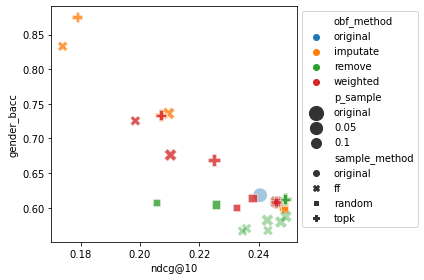

In [156]:
ax = sns.scatterplot(concat_attack[concat_attack["dataset_x"]=="ml-1m"],
                x="ndcg@10",y="gender_bacc",hue="obf_method",
                style="sample_method",
                size="p_sample",
                sizes=(100,200),alpha=0.4)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("figures/ml-1m_bacc_ndcg.png",dpi=250)


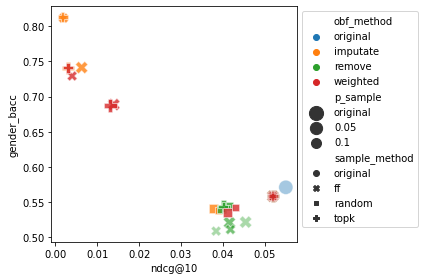

In [108]:
ax2 =sns.scatterplot(concat_attack[concat_attack["dataset_x"]=="lfm-100k"],x="ndcg@10",y="gender_bacc",hue="obf_method",style="sample_method",size="p_sample",sizes=(100,200),alpha=0.4)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("figures/lfm-100k_bacc_ndcg.png",dpi=250)
#In the end there is no place like /home/gustavoe/portraits/sendlicholieinsamdkeit~keitao/

In [176]:
sub_data = concat_attack[["dataset_x","dataset_name","ndcg@10","gender_bacc",'obf_method', 'p_sample',

       'sample_method', 'user_ster_method']]

/tmp/ipykernel_329100/3606219402.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=sub_data,x="ndcg@10",col="obf_method",row="dataset_x",hue="sample_method",kind="kde")#,facet_kws=dict(sharex=False,sharey=False))
/tmp/ipykernel_329100/3606219402.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=sub_data,x="ndcg@10",col="obf_method",row="dataset_x",hue="sample_method",kind="kde")#,facet_kws=dict(sharex=False,sharey=False))


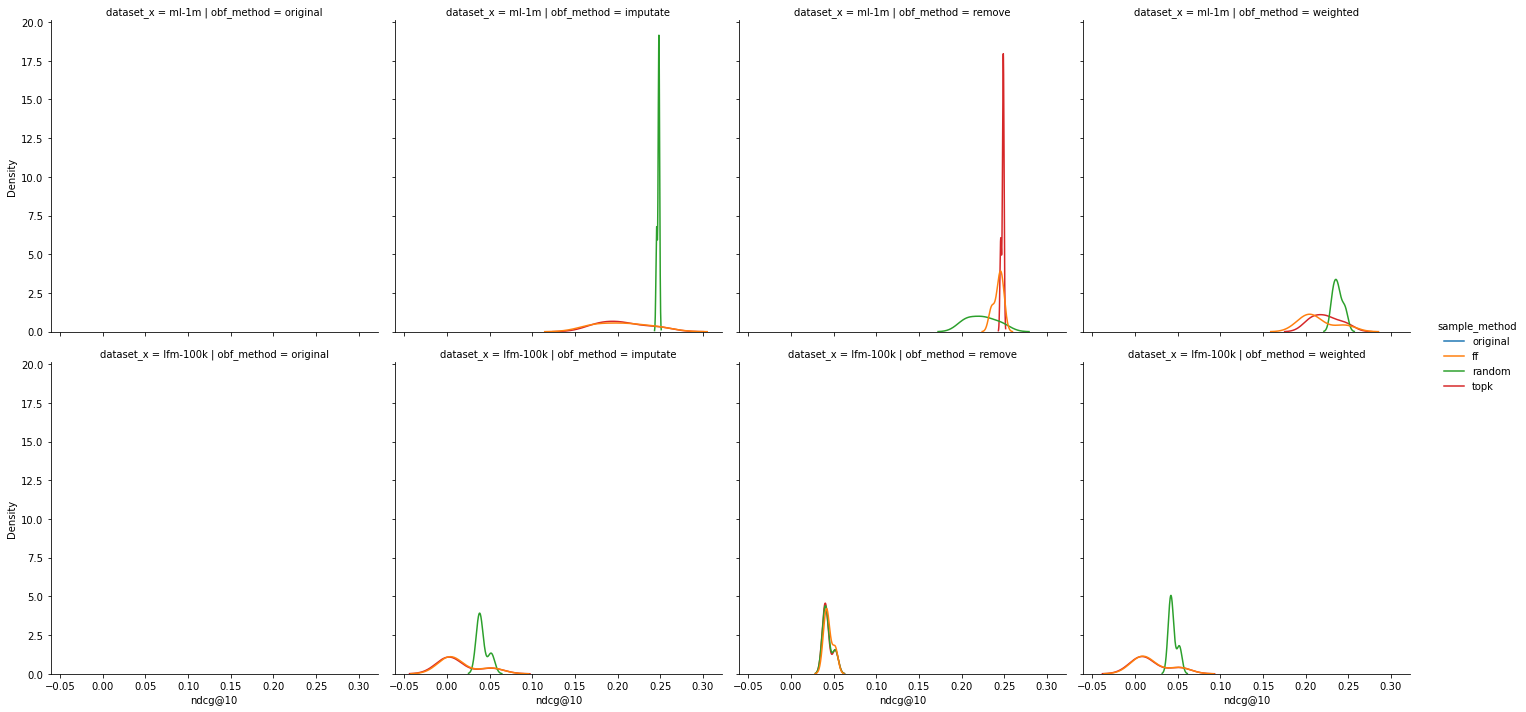

In [197]:
sns.displot(data=sub_data,x="ndcg@10",col="obf_method",row="dataset_x",hue="sample_method",kind="kde")#,facet_kws=dict(sharex=False,sharey=False))



/tmp/ipykernel_329100/2173548486.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=sub_data,x="gender_bacc",col="obf_method",row="dataset_x",hue="sample_method",kind="kde")#,facet_kws=dict(sharex=False,sharey=False))
/tmp/ipykernel_329100/2173548486.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=sub_data,x="gender_bacc",col="obf_method",row="dataset_x",hue="sample_method",kind="kde")#,facet_kws=dict(sharex=False,sharey=False))


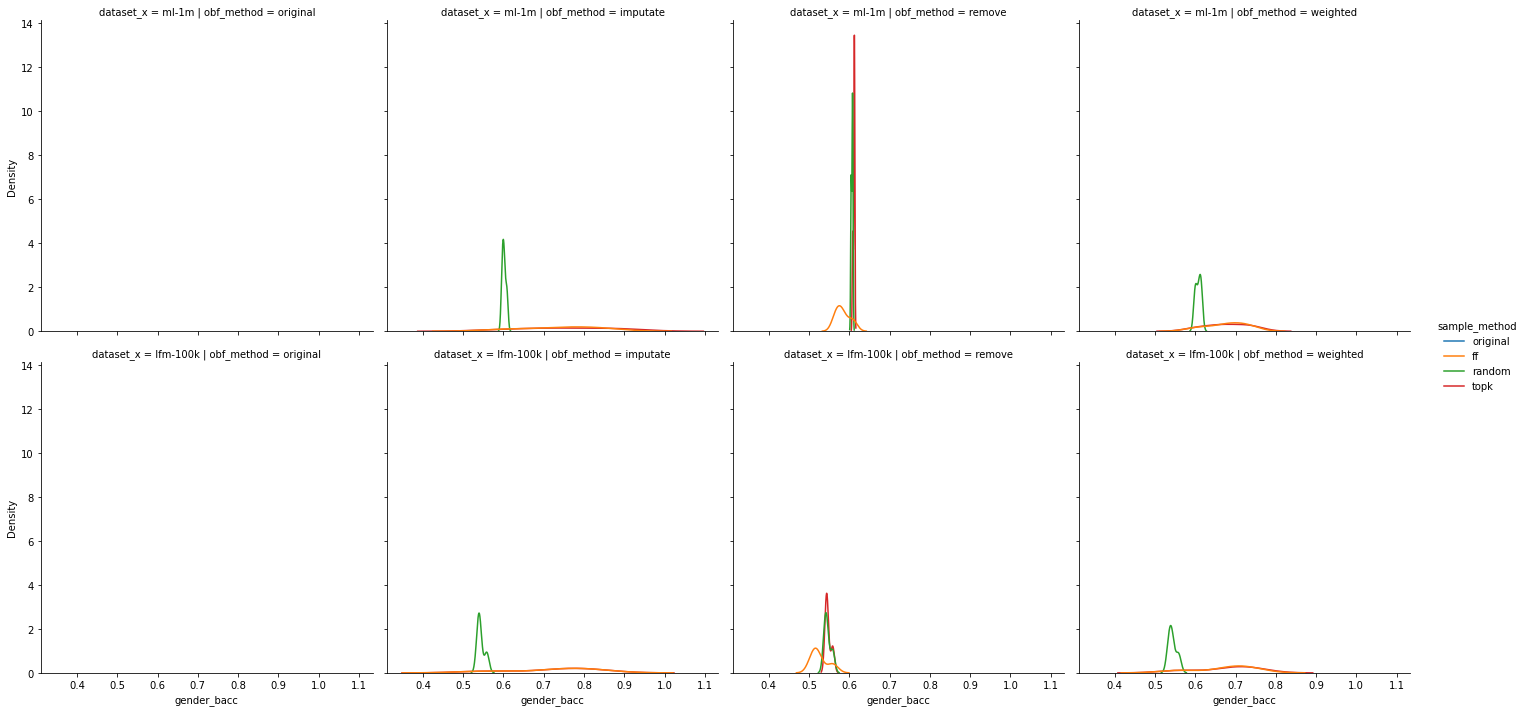

In [198]:
sns.displot(data=sub_data,x="gender_bacc",col="obf_method",row="dataset_x",hue="sample_method",kind="kde")#,facet_kws=dict(sharex=False,sharey=False))

In [200]:
sorted_data = sub_data.sort_values(["dataset_x","gender_bacc","ndcg@10"])

In [218]:
top20_variants = sorted_data.groupby(["dataset_x"]).head(20).reset_index()
print(top20_variants[["dataset_x","ndcg@10","gender_bacc",'obf_method', 'p_sample','sample_method', 'user_ster_method']].to_latex())

\begin{tabular}{llrrllll}
\toprule
{} & dataset\_x &   ndcg@10 &  gender\_bacc & obf\_method & p\_sample & sample\_method & user\_ster\_method \\
\midrule
0  &  lfm-100k &  0.038376 &     0.508851 &     remove &      0.1 &            ff &         mean-abs \\
1  &  lfm-100k &  0.041803 &     0.511076 &     remove &      0.1 &            ff &             diff \\
2  &  lfm-100k &  0.041803 &     0.511076 &     remove &      0.1 &            ff &       median-abs \\
3  &  lfm-100k &  0.041561 &     0.520933 &     remove &     0.05 &            ff &             diff \\
4  &  lfm-100k &  0.041561 &     0.520933 &     remove &     0.05 &            ff &       median-abs \\
5  &  lfm-100k &  0.045428 &     0.521616 &     remove &     0.05 &            ff &         mean-abs \\
6  &  lfm-100k &  0.041029 &     0.535028 &   weighted &     0.05 &        random &             diff \\
7  &  lfm-100k &  0.041029 &     0.535028 &   weighted &     0.05 &        random &         mean-abs \\
8  &  lfm-100

/tmp/ipykernel_329100/2819601403.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(top20_variants[["dataset_x","ndcg@10","gender_bacc",'obf_method', 'p_sample','sample_method', 'user_ster_method']].to_latex())


In [219]:

print(sub_data[sub_data["obf_method"]=="original"][["dataset_x","ndcg@10","gender_bacc",'obf_method', 'p_sample','sample_method', 'user_ster_method']].to_latex(index=False))

\begin{tabular}{lrrllll}
\toprule
dataset\_x &  ndcg@10 &  gender\_bacc & obf\_method & p\_sample & sample\_method & user\_ster\_method \\
\midrule
    ml-1m & 0.240455 &     0.618173 &   original & original &      original &         original \\
 lfm-100k & 0.055029 &     0.571050 &   original & original &      original &         original \\
\bottomrule
\end{tabular}



/tmp/ipykernel_329100/1895102186.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sub_data[sub_data["obf_method"]=="original"][["dataset_x","ndcg@10","gender_bacc",'obf_method', 'p_sample','sample_method', 'user_ster_method']].to_latex(index=False))


In [237]:
import json


dicts = top20_variants.groupby(["dataset_x"])["dataset_name"].apply(list)

In [238]:
dicts["lfm-100k"]

['lfm-100k_remove_0.1_ff_mean-abs_th0.3',
 'lfm-100k_remove_0.1_ff_diff_th0.3',
 'lfm-100k_remove_0.1_ff_median-abs_th0.3',
 'lfm-100k_remove_0.05_ff_diff_th0.3',
 'lfm-100k_remove_0.05_ff_median-abs_th0.3',
 'lfm-100k_remove_0.05_ff_mean-abs_th0.3',
 'lfm-100k_weighted_0.05_random_diff_th0.3',
 'lfm-100k_weighted_0.05_random_mean-abs_th0.3',
 'lfm-100k_weighted_0.05_random_median-abs_th0.3',
 'lfm-100k_imputate_0.1_random_diff_th0.3',
 'lfm-100k_imputate_0.1_random_mean-abs_th0.3',
 'lfm-100k_imputate_0.1_random_median-abs_th0.3',
 'lfm-100k_remove_0.1_random_diff_th0.3',
 'lfm-100k_remove_0.1_random_mean-abs_th0.3',
 'lfm-100k_remove_0.1_random_median-abs_th0.3',
 'lfm-100k_imputate_0.05_random_diff_th0.3',
 'lfm-100k_imputate_0.05_random_mean-abs_th0.3',
 'lfm-100k_imputate_0.05_random_median-abs_th0.3',
 'lfm-100k_weighted_0.1_random_diff_th0.3',
 'lfm-100k_weighted_0.1_random_mean-abs_th0.3']

In [239]:
dicts["ml-1m"]

['ml-1m_remove_0.1_ff_median-abs_th0.3',
 'ml-1m_remove_0.1_ff_mean-abs_th0.3',
 'ml-1m_remove_0.1_ff_diff_th0.3',
 'ml-1m_remove_0.05_ff_mean-abs_th0.3',
 'ml-1m_remove_0.05_ff_diff_th0.3',
 'ml-1m_remove_0.05_ff_median-abs_th0.3',
 'ml-1m_imputate_0.1_random_diff_th0.3',
 'ml-1m_imputate_0.1_random_mean-abs_th0.3',
 'ml-1m_imputate_0.1_random_median-abs_th0.3',
 'ml-1m_weighted_0.1_random_diff_th0.3',
 'ml-1m_weighted_0.1_random_mean-abs_th0.3',
 'ml-1m_weighted_0.1_random_median-abs_th0.3',
 'ml-1m_imputate_0.05_random_diff_th0.3',
 'ml-1m_imputate_0.05_random_mean-abs_th0.3',
 'ml-1m_imputate_0.05_random_median-abs_th0.3',
 'ml-1m_remove_0.05_random_diff_th0.3',
 'ml-1m_remove_0.05_random_mean-abs_th0.3',
 'ml-1m_remove_0.05_random_median-abs_th0.3',
 'ml-1m_remove_0.1_random_diff_th0.3',
 'ml-1m_remove_0.1_random_mean-abs_th0.3']

In [251]:
results_recs = pd.read_csv("/share/rk4/home/gustavoe/obfuscation/full_train/result_BPR.csv")
concat_attack = ml_results.merge(results_recs,how="left",left_on="dataset_name",right_on="dataset"
                                  )

In [244]:
results_recs[["dataset","ndcg@10"]].sort_values("ndcg@10",ascending=False)

,dataset,ndcg@10
0,ml-1m,0.344512
16,ml-1m_imputate_0.1_ff_median_th0.3,0.344309
68,ml-1m_weighted_0.1_random_median_th0.3,0.344309
64,ml-1m_weighted_0.1_ff_median_th0.3,0.344309
60,ml-1m_weighted_0.05_topk_median_th0.3,0.344309
...,...,...
42,ml-1m_remove_0.1_random_mean-abs_th0.3,0.290364
43,ml-1m_remove_0.1_random_median-abs_th0.3,0.290364
13,ml-1m_imputate_0.1_ff_diff_th0.3,0.286638
14,ml-1m_imputate_0.1_ff_mean-abs_th0.3,0.286638


In [246]:
results_recs[["dataset","obf_method","p_sample","sample_method","user_ster_method","user_ster_threshold"]]=pd.DataFrame(results_recs["dataset"].str.split("_").to_list(),index=results_recs.index).astype(str)

/tmp/ipykernel_329100/755295508.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=results_recs,x="ndcg@10",col="obf_method",row="dataset",hue="sample_method",kind="kde")#,facet_kws=dict(sharex=False,sharey=False))


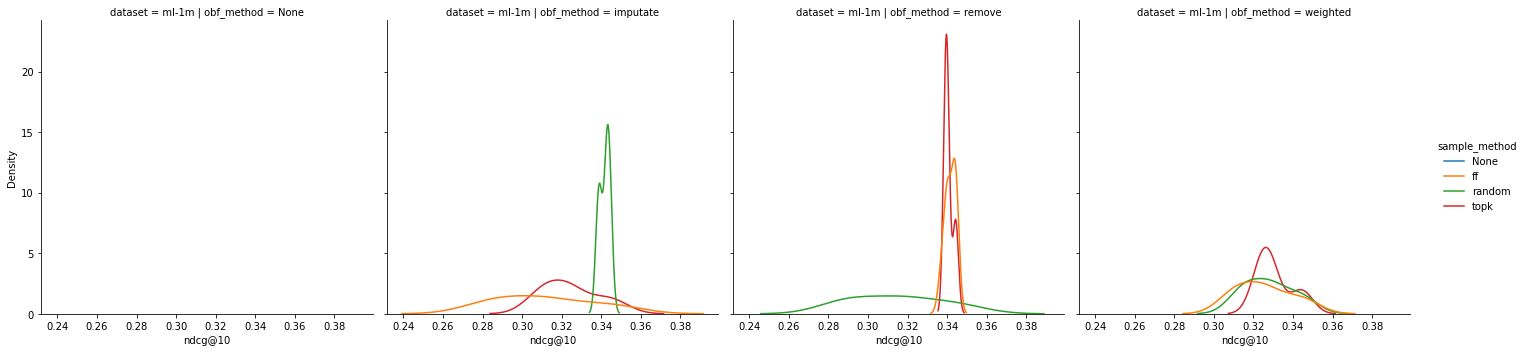

In [250]:
sns.displot(data=results_recs,x="ndcg@10",col="obf_method",row="dataset",hue="sample_method",kind="kde")#,facet_kws=dict(sharex=False,sharey=False))